In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import autograd.numpy as np

# add the data folder to path (this specifies a relative path to where my data is stored)
import os, sys
sys.path.append(os.path.join(os.getcwd(), "../data"))
from data_utils import rosenbrock

Recall our MLP forward pass computations

In [2]:
def forward_pass(x, W1, W2, b1, b2, phi1, phi2):
    """
    forward-pass for an MLP with a single hidden layer of M neurons
    Inputs:
        x : (N, 2) training inputs
        W1 : (M, 2) weights of first (hidden) layer
        W2 : (1, M) weights of second (output) layer
        b1 : (M, 1) biases of first (hidden) layer
        b2 : (1, 1) biases of second (output) layer
        phi1 : 1st layer activation function
        phi2 : 2nd layer activation function
    Outputs:
        Fhat : (N, 1) output of the neural network at training inputs
        Basically the result of prediction
    """
    H1 = phi1(np.dot(x, W1.T) + b1.T) # layer 1 neurons, shape (N, 2)
    Fhat = phi2(np.dot(H1, W2.T) + b2.T) # layer 2 neurons, shape (N, 1)
    return Fhat

Initialize the weights and biases in the neural network, as well as the activation functions

In [3]:
np.random.seed(0)
scale = 0.1 # standard deviation of initialization
M = 50 # number of neurons in hidden layer
W1 = scale * np.random.randn(M, 2)
W2 = scale * np.random.randn(1, M)
b1 = scale * np.random.randn(M, 1)
b2 = scale * np.random.randn(1, 1)
phi1 = lambda z: np.maximum(0., z) # relu on hidden layer
phi2 = lambda z: z # linear activation on output layer

Create a training set using the two-dimensional Rosenbrock dataset and plot the initial neural network compared to the exact Rosenbrock function

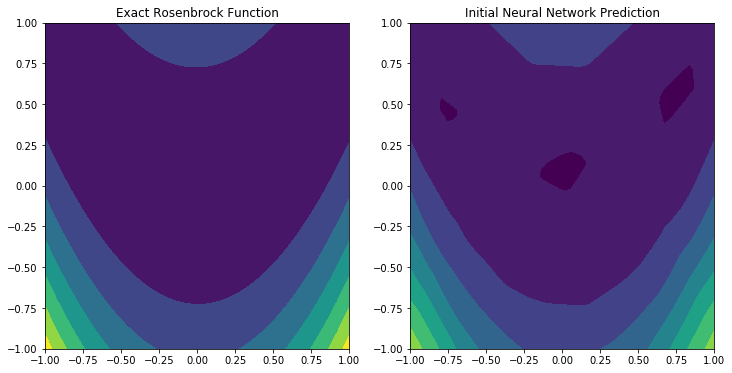

In [9]:
x_train = 2.*np.random.rand(1000, 2) - 1
y_train = rosenbrock(x_train)
y_train = (y_train - y_train.mean())/y_train.std() # transform training set to zero mean and unit variance

# get a grid to evaluate the exact rosenbrock function on
xx1, xx2 = np.meshgrid(np.linspace(-1,1,num=50), np.linspace(-1,1,num=50))
x_test = np.c_[xx1.flatten(), xx2.flatten()]
y_test = (rosenbrock(x_test).reshape((50,50)) - np.mean(rosenbrock(x_train)))/np.std(rosenbrock(x_train))

# plot
fig, axs = plt.subplots(ncols=2, figsize=(12,6))
axs[0].contourf(xx1, xx2, y_test, vmin=y_test.min(), vmax=y_test.max())
axs[0].set_title("Exact Rosenbrock Function")
axs[1].contourf(xx1, xx2, forward_pass(x_test, W1, W2, b1, b2, phi1, phi2).reshape((50,50)), 
                vmin=y_test.min(), vmax=y_test.max());
axs[1].set_title("Initial Neural Network Prediction");


define an optimizer and a loss function to minimize

In [5]:
def update_parameters(w, grad_w, learning_rate=1.):
    """
    perform gradient descent update to minimize an objective
    Inputs:
        w : vector of parameters
        grad_w : gradient of the loss with respect to the parameters
        learning_rate : learning rate of the optimizer
    """
    return w - learning_rate * grad_w


def least_squares_loss(W1, W2, b1, b2, phi1, phi2, x, y):
    """ compute the least squares loss for the MLP. The learnable parameters are the inputs. """
    return np.sum(np.square(forward_pass(x, W1, W2, b1, b2, phi1, phi2) - y))

Define a function that computes the gradient of the parameters with respect to the least squares loss using the autograd.grad function. Note the argnum arguement specifies which inputs to our loss we wish to find the gradient with respect to.

In [6]:
from autograd import grad
least_squares_gradient = grad(least_squares_loss, argnum=[0,1,2,3])

Now train the neural network using gradient descent (just using full batch for now)

In [7]:
learning_rate = 0.0002
for i in range(2000):
    # compute the gradient
    W1_grad, W2_grad, b1_grad, b2_grad = least_squares_gradient(W1, W2, b1, b2, phi1, phi2, x_train, y_train)
    # update the parameters
    W1 = update_parameters(W1, W1_grad, learning_rate)
    W2 = update_parameters(W2, W2_grad, learning_rate)
    b1 = update_parameters(b1, b1_grad, learning_rate)
    b2 = update_parameters(b2, b2_grad, learning_rate)
    # print loss if nessessary
    if i==0 or (i+1) % 200 == 0:
        print("Iter %3d, loss = %.6f" % (i+1, least_squares_loss(W1, W2, b1, b2, phi1, phi2, x_train, y_train)))

Iter   1, loss = 926.423482
Iter 200, loss = 57.905487
Iter 400, loss = 27.644657
Iter 600, loss = 16.099811
Iter 800, loss = 11.373363
Iter 1000, loss = 9.786872
Iter 1200, loss = 8.788905
Iter 1400, loss = 6.256851
Iter 1600, loss = 5.213373
Iter 1800, loss = 4.761548
Iter 2000, loss = 4.246644


Now plot the prediction of the trained model alongside the exact function

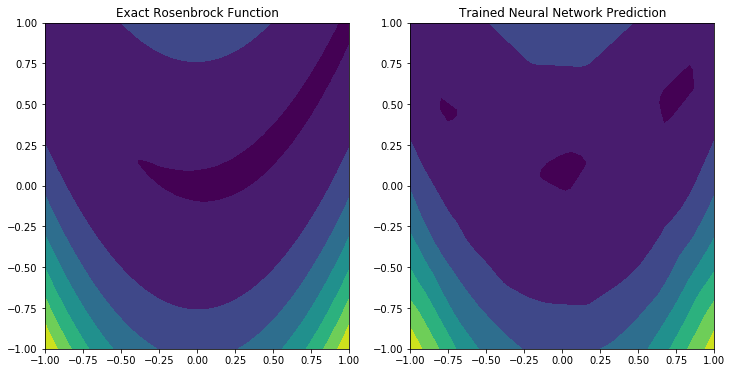

In [8]:
fig, axs = plt.subplots(ncols=2, figsize=(12,6))
axs[0].contourf(xx1, xx2, y_test, vmin=y_test.min(), vmax=y_test.max())
axs[0].set_title("Exact Rosenbrock Function")
axs[1].contourf(xx1, xx2, forward_pass(x_test, W1, W2, b1, b2, phi1, phi2).reshape((50,50)),
                vmin=y_test.min(), vmax=y_test.max());
axs[1].set_title("Trained Neural Network Prediction");